<a href="https://colab.research.google.com/github/neomatrix369/nlp_profiler/blob/master/notebooks/nlp_profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash

# When running from inside this repo:
# cd ../..
# python setup.py install
# or
# pip install --prefix .

# When running independently
# pip install -U git+https://github.com/neomatrix369/nlp_profiler.git

pip install nlp_profiler
echo "Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect"

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.54.1
    Uninstalling tqdm-4.54.1:
      Successfully uninstalled tqdm-4.54.1
Once successfully installed, please RESTART your Jupyter kernels or Colab runtimes for the changes to take effect


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

zappa 0.51.0 requires python-dateutil<2.7.0, but you'll have python-dateutil 2.8.1 which is incompatible.
pandas-profiling 2.8.0 requires jinja2>=2.11.1, but you'll have jinja2 2.10.3 which is incompatible.
pandas-profiling 2.8.0 requires matplotlib>=3.2.0, but you'll have matplotlib 3.1.3 which is incompatible.
neuralmagicml 1.2.0 requires gast==0.2.2, but you'll have gast 0.3.0 which is incompatible.
neuralmagicml 1.2.0 requires pandas<1.0.0, but you'll have pandas 1.1.5 which is incompatible.
neuralmagicml 1.2.0 requires scipy~=1.3.0, but you'll have scipy 1.4.1 which is incompatible.
neuralmagicml 1.2.0 requires tqdm~=4.32.0, but you'll have tqdm 4.46.0 which is incompatible.
You should consi

In [2]:
!pip install matplotlib

You should consider upgrading via the '/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

import sys

sys.path.insert(0, "..")

from nlp_profiler.core import apply_text_profiling
import pandas as pd
from matplotlib import pyplot as plt

/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/swami/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/swami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/swami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


self._url: http://127.0.0.1:8081/v2/


#### Text messages with Emojis, Numbers, Alphanumeric, None-alphanumeric, Punctuations, Dates and Duplicates

In [4]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = "2833047 people live in this area. This is not a good area."
text_with_two_numbers = "2833047 and 1111 people live in this area."
text_with_punctuations = "This sentence does not seem to too many commas, periods or semicolons (;)."
text_with_a_date = "The date today is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "The date today date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = "Everyone here works so hard. People work hard. I think they have a good trait."

In [5]:
data = [
    text_with_emojis,
    text_with_a_number,
    text_with_two_numbers,
    text_with_punctuations,
    text_with_a_date,
    text_with_dates,
    text_with_duplicates,
]
text_dataframe = pd.DataFrame(data, columns=["text"])
text_dataframe

,text
0,I love ⚽ very much 😁.
1,2833047 people live in this area. This is not ...
2,2833047 and 1111 people live in this area.
3,This sentence does not seem to too many commas...
4,The date today is 04/28/2020 for format mm/dd/...
5,The date today date is 28/04/2020 and tomorrow...
6,Everyone here works so hard. People work hard....


## Pandas describe() function

In [6]:
text_dataframe.describe()

,text
count,7
unique,7
top,2833047 people live in this area. This is not ...
freq,1


## NLP profiler's equivalent to that

In [7]:
%%time
profiled_text_dataframe = apply_text_profiling(text_dataframe, "text", params={"parallelisation_method": "default"})
profiled_text_dataframe.head()

final params: {'high_level': True, 'granular': True, 'grammar_check': False, 'spelling_check': True, 'ease_of_reading_check': True, 'parallelisation_method': 'default'}





CPU times: user 4.9 s, sys: 672 ms, total: 5.58 s
Wall time: 19.8 s


,text,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,...,sentiment_polarity_summarised,sentiment_subjectivity_score,sentiment_subjectivity,sentiment_subjectivity_summarised,spelling_quality_score,spelling_quality,spelling_quality_summarised,ease_of_reading_score,ease_of_reading_quality,ease_of_reading_summarised
0,I love ⚽ very much 😁.,1,21,0,5,16,0,5,16,0,...,Positive,0.43,Objective/subjective,Objective/subjective,1.000000,Very good,Good,116.15,Very Easy,Easy
1,2833047 people live in this area. This is not ...,2,58,0,11,47,0,11,47,0,...,Negative,0.55,Objective/subjective,Objective/subjective,1.000000,Very good,Good,107.69,Very Easy,Easy
2,2833047 and 1111 people live in this area.,1,42,0,7,35,0,7,35,0,...,Positive,0.50,Objective/subjective,Objective/subjective,1.000000,Very good,Good,105.66,Very Easy,Easy
3,This sentence does not seem to too many commas...,1,74,0,12,62,0,12,62,0,...,Positive,0.75,Pretty subjective,Subjective,0.941176,Pretty good,Good,67.76,Standard,Standard
4,The date today is 04/28/2020 for format mm/dd/...,1,67,1,9,58,0,9,58,0,...,Neutral,0.00,Very objective,Objective,0.750000,Bad,Bad,86.71,Easy,Easy


### Sentiment Analysis

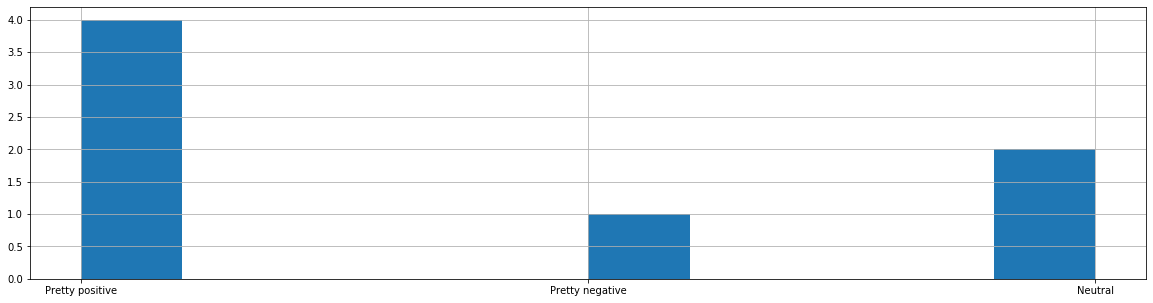

In [8]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe["sentiment_polarity"].hist()

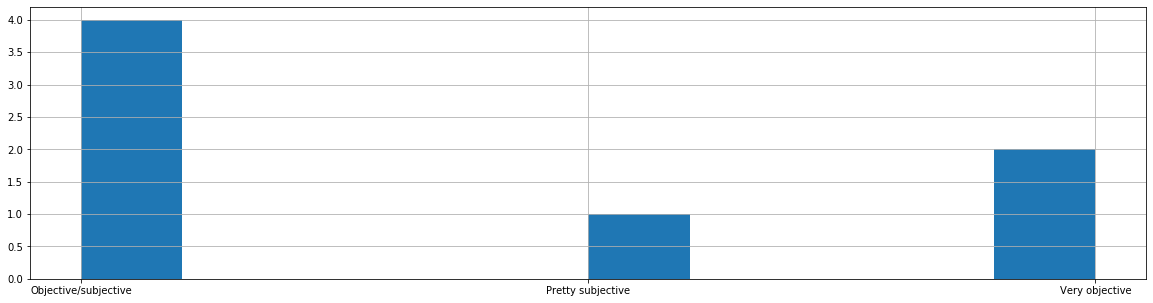

In [9]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe["sentiment_subjectivity"].hist()

### Spelling quality check

#### The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

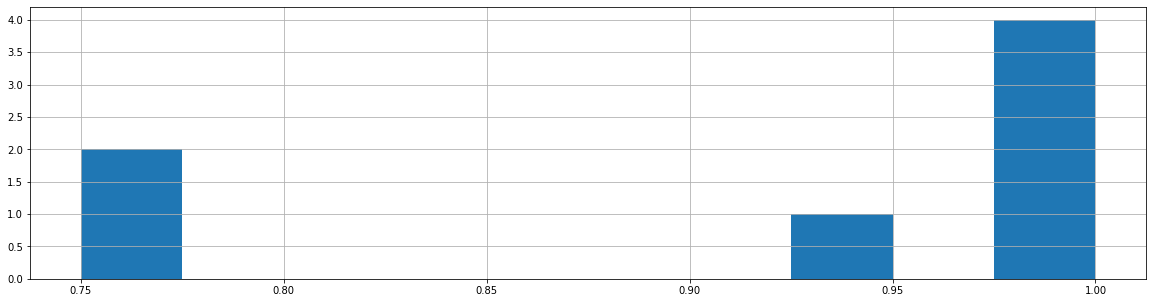

In [10]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe["spelling_quality_score"].hist()

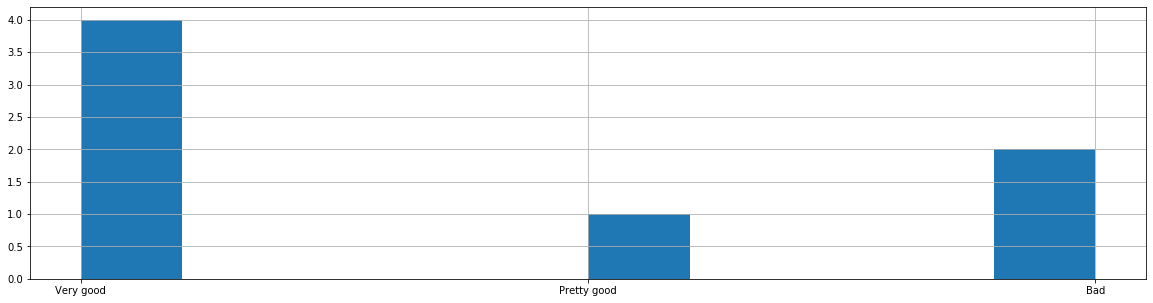

In [11]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe["spelling_quality"].hist()

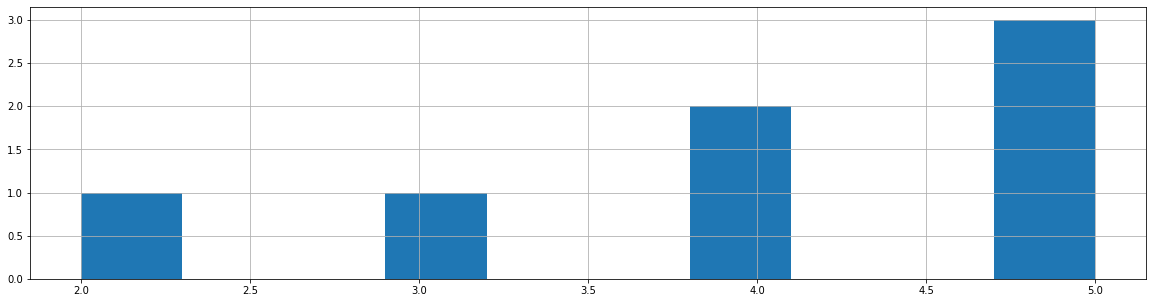

In [12]:
plt.figure(figsize=[20, 5])
profiled_text_dataframe["noun_phase_count"].hist()

### Ease of Reading check

#### The ease of reading check score and ease of reading  check is supported by a third-party library.

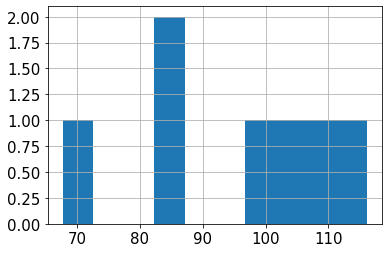

In [13]:
profiled_text_dataframe["ease_of_reading_score"].hist(xlabelsize=15, ylabelsize=15)

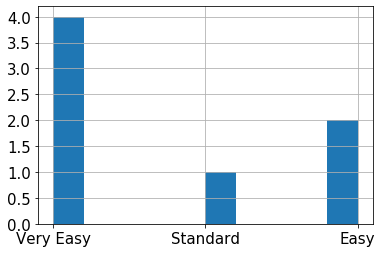

In [14]:
profiled_text_dataframe["ease_of_reading_quality"].hist(xlabelsize=15, ylabelsize=15)

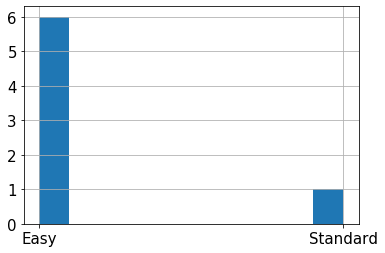

In [15]:
profiled_text_dataframe["ease_of_reading_summarised"].hist(xlabelsize=15, ylabelsize=15)

### English and non-English characters, repeated letters, digits, spaces, whitespaces and punctuations counts

In [17]:
selected_repeat_columns = [
    "repeated_letters_count",
    "repeated_digits_count",
    "repeated_spaces_count",
    "repeated_whitespaces_count",
    "repeated_punctuations_count",
    "english_characters_count",
    "non_english_characters_count",
]
filter_columns = profiled_text_dataframe[selected_repeat_columns] > 0
profiled_text_dataframe[filter_columns][selected_repeat_columns].describe()

,repeated_letters_count,repeated_digits_count,repeated_spaces_count,repeated_whitespaces_count,repeated_punctuations_count,english_characters_count,non_english_characters_count
count,1.0,2.000000,0.0,0.0,0.0,7.00000,1.0
mean,1.0,1.500000,NaN,NaN,NaN,58.00000,2.0
std,NaN,0.707107,NaN,NaN,NaN,20.87263,NaN
min,1.0,1.000000,NaN,NaN,NaN,19.00000,2.0
25%,1.0,1.250000,NaN,NaN,NaN,50.00000,2.0
50%,1.0,1.500000,NaN,NaN,NaN,67.00000,2.0
75%,1.0,1.750000,NaN,NaN,NaN,71.00000,2.0
max,1.0,2.000000,NaN,NaN,NaN,78.00000,2.0


### Running describe() on the new NLP profiler generated dataframe

In [18]:
percentiles = [value / 100 for value in range(10, 100, 10)] + [0.25, 0.75]
profiled_text_dataframe.describe(percentiles=percentiles)

,sentences_count,characters_count,repeated_letters_count,spaces_count,chars_excl_spaces_count,repeated_spaces_count,whitespaces_count,chars_excl_whitespaces_count,repeated_whitespaces_count,count_words,...,repeated_punctuations_count,stop_words_count,dates_count,noun_phase_count,english_characters_count,non_english_characters_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,ease_of_reading_score
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.0,7.000000,...,7.0,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1.428571,58.285714,0.142857,9.714286,48.571429,0.0,9.714286,48.571429,0.0,9.714286,...,0.0,3.571429,0.428571,4.000000,58.00000,0.285714,0.117633,0.398730,0.922915,95.700000
std,0.786796,20.254335,0.377964,3.039424,17.529567,0.0,3.039424,17.529567,0.0,3.683942,...,0.0,1.511858,0.786796,1.154701,20.87263,0.755929,0.191346,0.289207,0.113740,16.550124
min,1.000000,21.000000,0.000000,5.000000,16.000000,0.0,5.000000,16.000000,0.0,4.000000,...,0.0,1.000000,0.000000,2.000000,19.00000,0.000000,-0.106818,0.000000,0.750000,67.760000
10%,1.000000,33.600000,0.000000,6.200000,27.400000,0.0,6.200000,27.400000,0.0,5.200000,...,0.0,2.200000,0.000000,2.600000,32.80000,0.000000,-0.042727,0.000000,0.761538,78.518000
20%,1.000000,45.200000,0.000000,7.400000,37.400000,0.0,7.400000,37.400000,0.0,6.800000,...,0.0,3.000000,0.000000,3.200000,45.20000,0.000000,0.000000,0.086000,0.803620,85.894000
25%,1.000000,50.000000,0.000000,8.000000,41.000000,0.0,8.000000,41.000000,0.0,8.000000,...,0.0,3.000000,0.000000,3.500000,50.00000,0.000000,0.000000,0.215000,0.855204,86.200000
30%,1.000000,54.800000,0.000000,8.600000,44.600000,0.0,8.600000,44.600000,0.0,9.200000,...,0.0,3.000000,0.000000,3.800000,54.80000,0.000000,0.000000,0.344000,0.906787,86.506000
40%,1.000000,61.600000,0.000000,9.400000,51.400000,0.0,9.400000,51.400000,0.0,10.000000,...,0.0,3.000000,0.000000,4.000000,61.60000,0.000000,0.015556,0.458000,0.964706,92.122000
50%,1.000000,67.000000,0.000000,10.000000,58.000000,0.0,10.000000,58.000000,0.0,10.000000,...,0.0,3.000000,0.000000,4.000000,67.00000,0.000000,0.038889,0.500000,1.000000,100.240000


### Resources

- https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
- https://textblob.readthedocs.io/en/dev/quickstart.html
- [Approaching (Almost) Any NLP Problem on Kaggle](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
- [Words of estimative probability](https://en.wikipedia.org/wiki/Words_of_estimative_probability)
- [NLP Profiler source file](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp/library/org/neomatrix369/nlp_profiler.py)
- [Kaggle Utility script](https://www.kaggle.com/neomatrix369/nlp-profiler-class)
- [Kaggle kernel](https://www.kaggle.com/neomatrix369/nlp-profiler-simple-dataset)
- [Awesome AI-ML-DL: Better NLP library](https://bit.ly/better-nlp-launch)
- [Awesome AI-ML-DL: NLP Resources](https://github.com/neomatrix369/awesome-ai-ml-dl/tree/master/natural-language-processing)
- [Awesome AI-ML-DL Github](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/)